## Challenge: Analyzing text about Data Science

Let's discover concepts related to Data Science by doing some text mining. We will start with a text about Data Science, extract keywords from it, and then try to vizualize the result.

In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'

### Step 1: Getting the Data 

First, we will get the data. We will use requests library to do that:

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"116d9623-c05f-481f-9bdf-4d38bbf7d489","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1090504138,"wgRevisionId":1090504138,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Comput

### Step 2: Transforming the Data

Let's convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from page, and we need to convert it into plain text.

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Data science  is an  interdisciplinary  field that uses  scientific methods , processes,  algorithms  and systems to extract  knowledge  and insights from noisy, structured and  unstructured data , [1] [2]  and apply knowledge from data across a broad range of application domains. Data science is related to  data mining ,  machine learning  and  big data .
 Data science is a "concept to unify  statistics ,  data analysis ,  informatics , and their related  methods " in order to "understand and analyse actual  phenomena " with  data . [3]  It uses

### Step 3: Getting Insights

We want to extract keywords from the text, and see which keywords are more meaningful.

In [4]:
#Install library RAKE
import sys
!{sys.executable} -m pip install nlp_rake

     |████████████████████████████████| 981 kB 15.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=ffc96cd0b078db2ced94bd30a1bed3a86866f9d11237fdfc13624b589be9acc7
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


The main funtionality is available from RAKE object, which we can customize using some parameters.

In [5]:
#import library RAKE
#min_chars: minimum length of a keyword
#min_freq: minimum frequency of a keyword
#max_words: maximum number of word in a keyword
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.9107142857142856),
 ('information science', 3.9107142857142856),
 ('computer science', 3.9107142857142856),
 ('application domains', 3.75),
 ('data analysis', 3.666666666666667),
 ('science', 1.9107142857142858),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

### Step 4: Visualizing the Result

We can use matplotlib library in Python to plot simple distribution of the keywords with their relevance

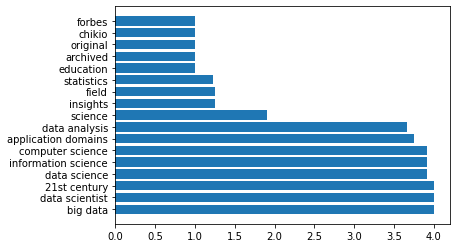

In [11]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.barh(range(len(k)),v)
    plt.yticks(range(len(k)),k,rotation='horizontal')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using Word Cloud. We will need to install another library to plot the word cloud from our keyword list.

In [7]:
!{sys.executable} -m pip install wordcloud

     |████████████████████████████████| 366 kB 16.6 MB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


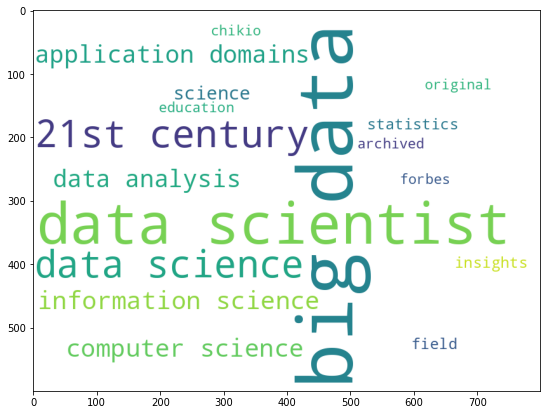

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

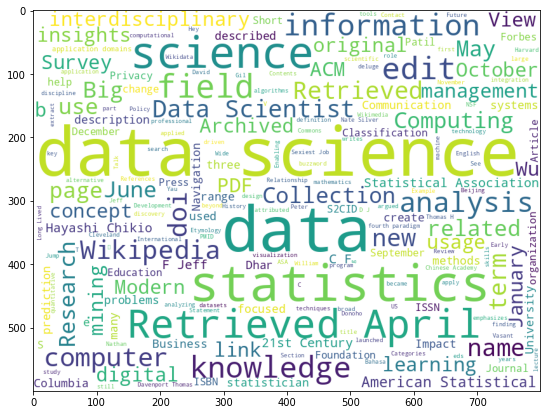

In [9]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [10]:
wc.generate(text).to_file('ds_wordcloud.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81382865-47e0-438f-b403-71f1a81403df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>